In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [2]:
print("Upload an image for corner detection:")
uploaded = files.upload()


Upload an image for corner detection:


Saving Snapchat-1620668676.jpg to Snapchat-1620668676.jpg


In [3]:
# Load and preprocess the image
file_name = list(uploaded.keys())[0]
input_image = cv2.imread(file_name)
gray_scale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
float_gray = np.float32(gray_scale_image)


In [4]:
# Compute gradients
gradient_x = cv2.Sobel(float_gray, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(float_gray, cv2.CV_64F, 0, 1, ksize=3)


In [5]:
# Compute second-order gradients
gradient_xx = gradient_x ** 2
gradient_yy = gradient_y ** 2
gradient_xy = gradient_x * gradient_y



In [6]:
# Apply Gaussian smoothing
kernel_size = 5
smooth_xx = cv2.GaussianBlur(gradient_xx, (kernel_size, kernel_size), sigmaX=1)
smooth_yy = cv2.GaussianBlur(gradient_yy, (kernel_size, kernel_size), sigmaX=1)
smooth_xy = cv2.GaussianBlur(gradient_xy, (kernel_size, kernel_size), sigmaX=1)



In [7]:
# Harris corner detection
response_factor = 0.04
determinant = (smooth_xx * smooth_yy) - (smooth_xy ** 2)
trace = smooth_xx + smooth_yy
harris_response_map = determinant - response_factor * (trace ** 2)


In [8]:
# Identify corners
threshold = 0.01 * harris_response_map.max()
corner_points = harris_response_map > threshold


In [9]:
# Mark corners on the image
marked_image = input_image.copy()
marked_image[corner_points] = [0, 0, 255]


In [10]:
# Visualization helper
def show_image(title, img, color_map='gray'):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap=color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()



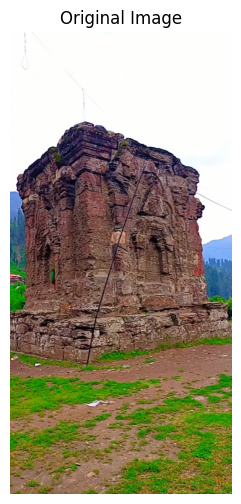

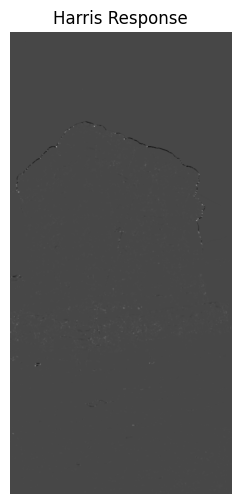

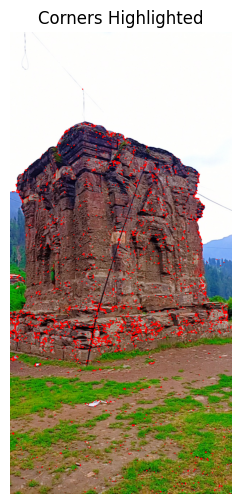

In [11]:
# Display results
show_image("Original Image", cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
show_image("Harris Response", harris_response_map)
show_image("Corners Highlighted", cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))